In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import os
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

warnings.filterwarnings('ignore')

# these lines are another way to load the wine dataset,
# have to adjust some syntax in next two cells if use this way
# wine dataset has 13 features and 178 instances
# wine = fetch_ucirepo(id=109) 
  
# data as pandas dataframes
# X = wine.data.features 
# y = wine.data.targets 
# print(wine.metadata)

data = 'wine.csv'
df = pd.read_csv(data)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [2]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [3]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [4]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,-3.771177e-15,-4.571836e-16,-2.087936e-15,-3.525406e-16,-2.793464e-16,-5.936112e-16,2.578583e-16,-3.142647e-16,-6.177854e-17,3.366483e-16,-2.130912e-16,-1.772775e-16,5.058677e-17
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-2.447137e+00,-1.319411e+00,-3.644349e+00,-2.503658e+00,-2.060863e+00,-1.937837e+00,-1.540971e+00,-1.812560e+00,-2.001427e+00,-1.588473e+00,-1.772641e+00,-1.851614e+00,-1.413367e+00
25%,-7.775506e-01,-6.856352e-01,-5.018707e-01,-6.874428e-01,-7.594980e-01,-8.755612e-01,-9.218143e-01,-7.619138e-01,-6.125960e-01,-8.326511e-01,-7.496066e-01,-9.688576e-01,-7.696952e-01
50%,7.133863e-02,-4.405162e-01,-1.142613e-02,-2.126345e-02,-1.430618e-01,-9.767432e-02,9.812354e-02,-1.961814e-01,-9.650484e-02,-1.921238e-01,1.766935e-02,2.475396e-01,-2.576836e-01
75%,8.231225e-01,7.629962e-01,7.333230e-01,6.098539e-01,4.220047e-01,7.471276e-01,8.200443e-01,6.928267e-01,5.706373e-01,5.871845e-01,6.996924e-01,7.897053e-01,7.785302e-01
max,2.213923e+00,2.885153e+00,3.112887e+00,2.937976e+00,4.240485e+00,2.712756e+00,1.819429e+00,2.390024e+00,3.302144e+00,2.882407e+00,3.214652e+00,1.943545e+00,2.601454e+00


In [5]:
#svm with default parameters
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy score with default parameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with default parameters: 1.0000


In [6]:
#svm with rbf kernel
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with rbf kernel and C=100.0 : 1.0000


In [7]:
#svm with linear kernel
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Accuracy score with linear kernel and C=1.0 : 1.0000


In [8]:
#svm with linear kernel and C=100
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(X_train,y_train)
y_pred=linear_svc100.predict(X_test)
print('Accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Accuracy score with linear kernel and C=100.0 : 1.0000


In [9]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2])

In [10]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [11]:
#checking for overfitting and underfitting
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [12]:
#check class distribution
y_test.value_counts()

target
1    22
0    19
2    13
Name: count, dtype: int64

In [13]:
#svm with polynomial kernel
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with polynomial kernel and C=1.0 : 0.9630


In [14]:
#svm with polynomial kernel and C=100
poly_svc100=SVC(kernel='poly', C=100.0) 
poly_svc100.fit(X_train,y_train)
y_pred=poly_svc100.predict(X_test)
print('Accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with polynomial kernel and C=100.0 : 0.9815


In [15]:
#svm with sigmoid kernel
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with sigmoid kernel and C=1.0 : 0.9815


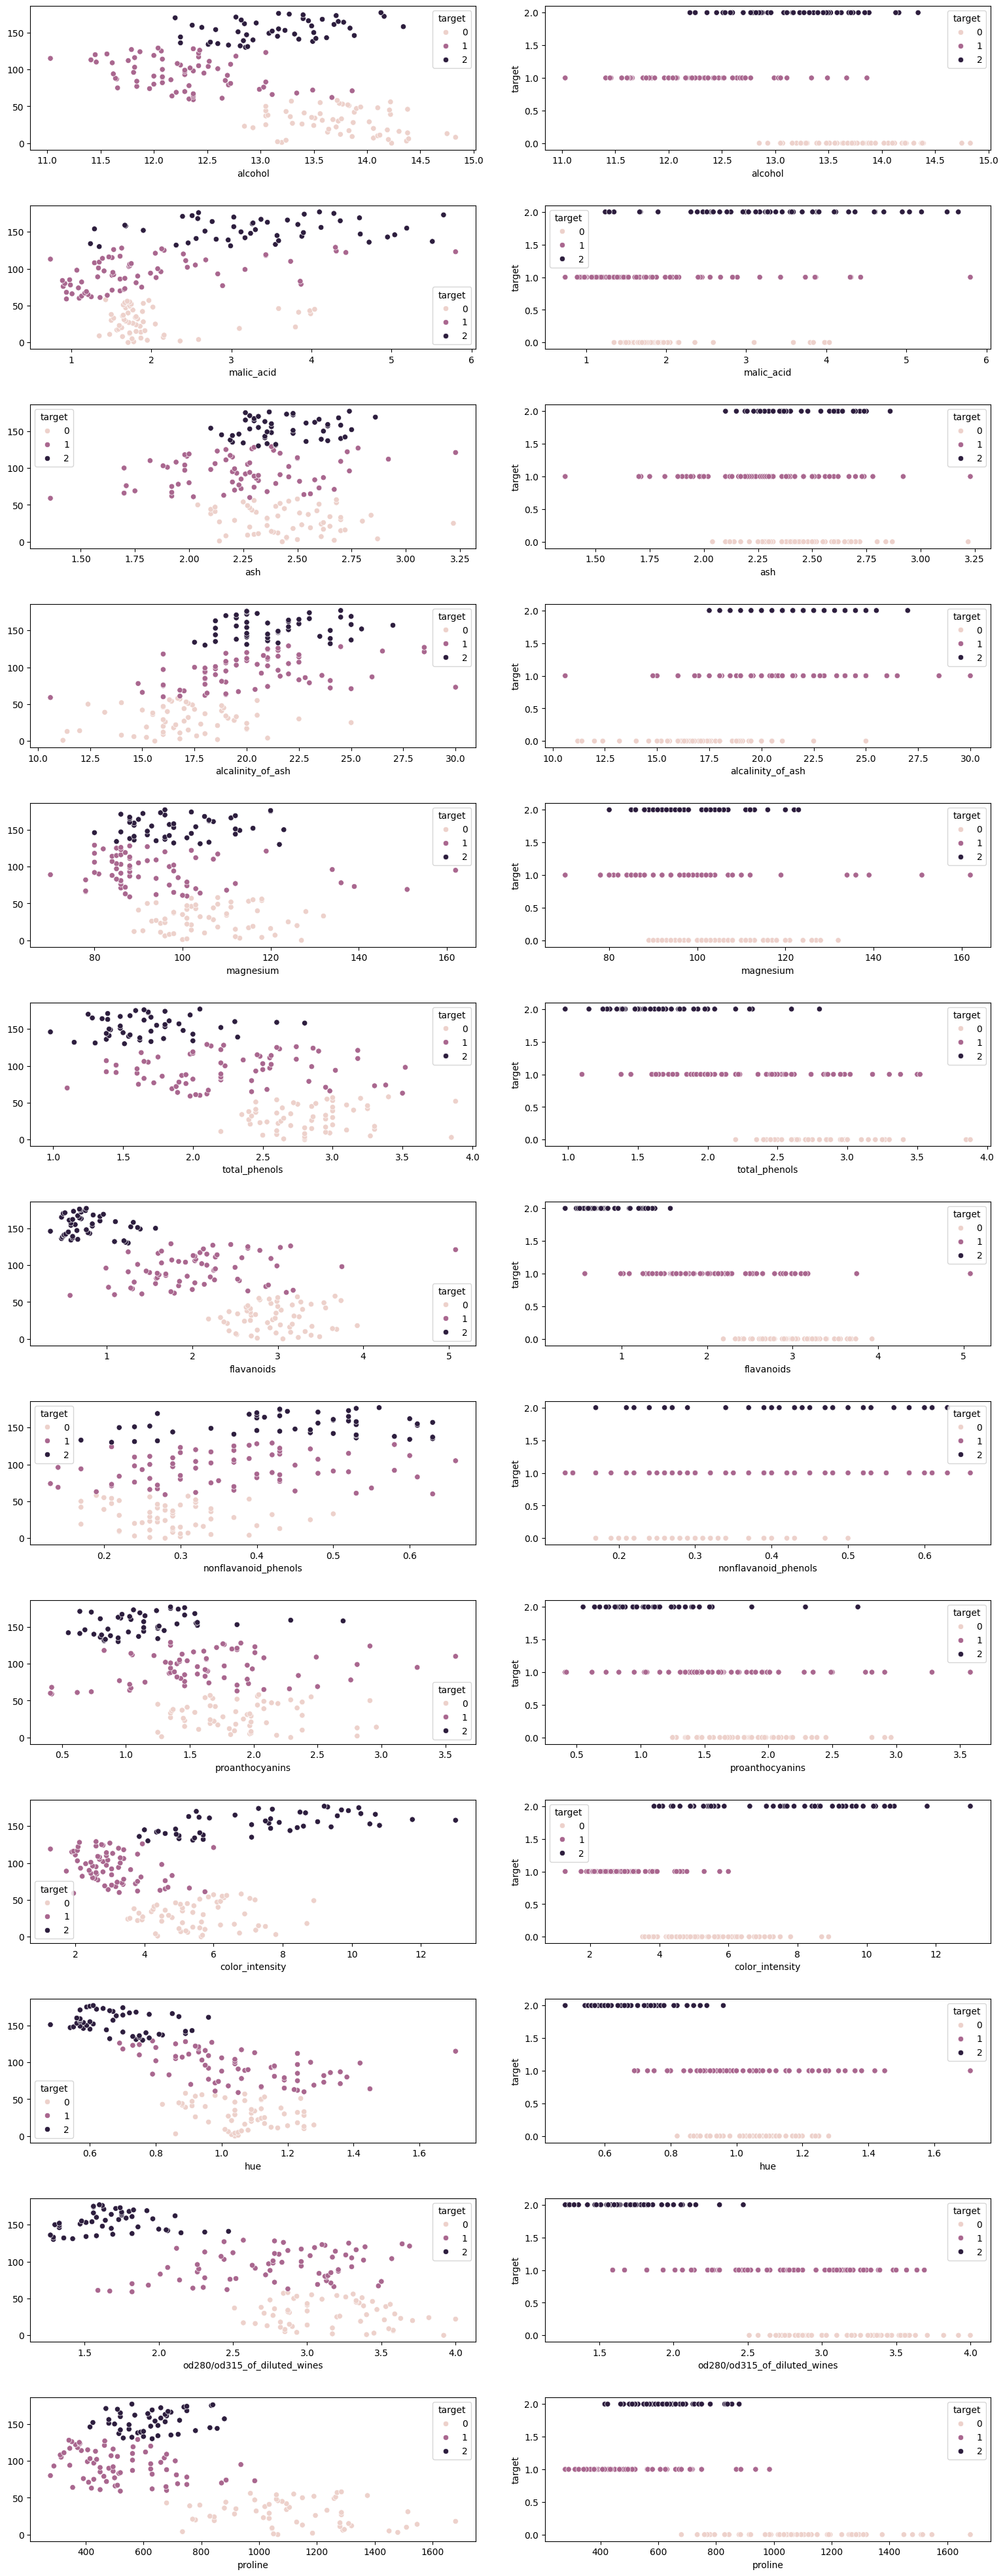

In [16]:
from sklearn import datasets

wine_dataset = datasets.load_wine()
df = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names'])
df['target'] = wine_dataset['target']
wine_dataset['target_names']

numbers = np.arange(df.shape[0])
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(16, 40), squeeze=False)
for i, column in enumerate(df.columns, start = 0):
    if column != "target":
        sns.scatterplot(x=column, y=numbers, data=df, hue='target', ax=axes[i, 0])
        sns.scatterplot(x=column, y='target', data=df, hue='target', ax=axes[i, 1])
fig.tight_layout(pad=3.0)

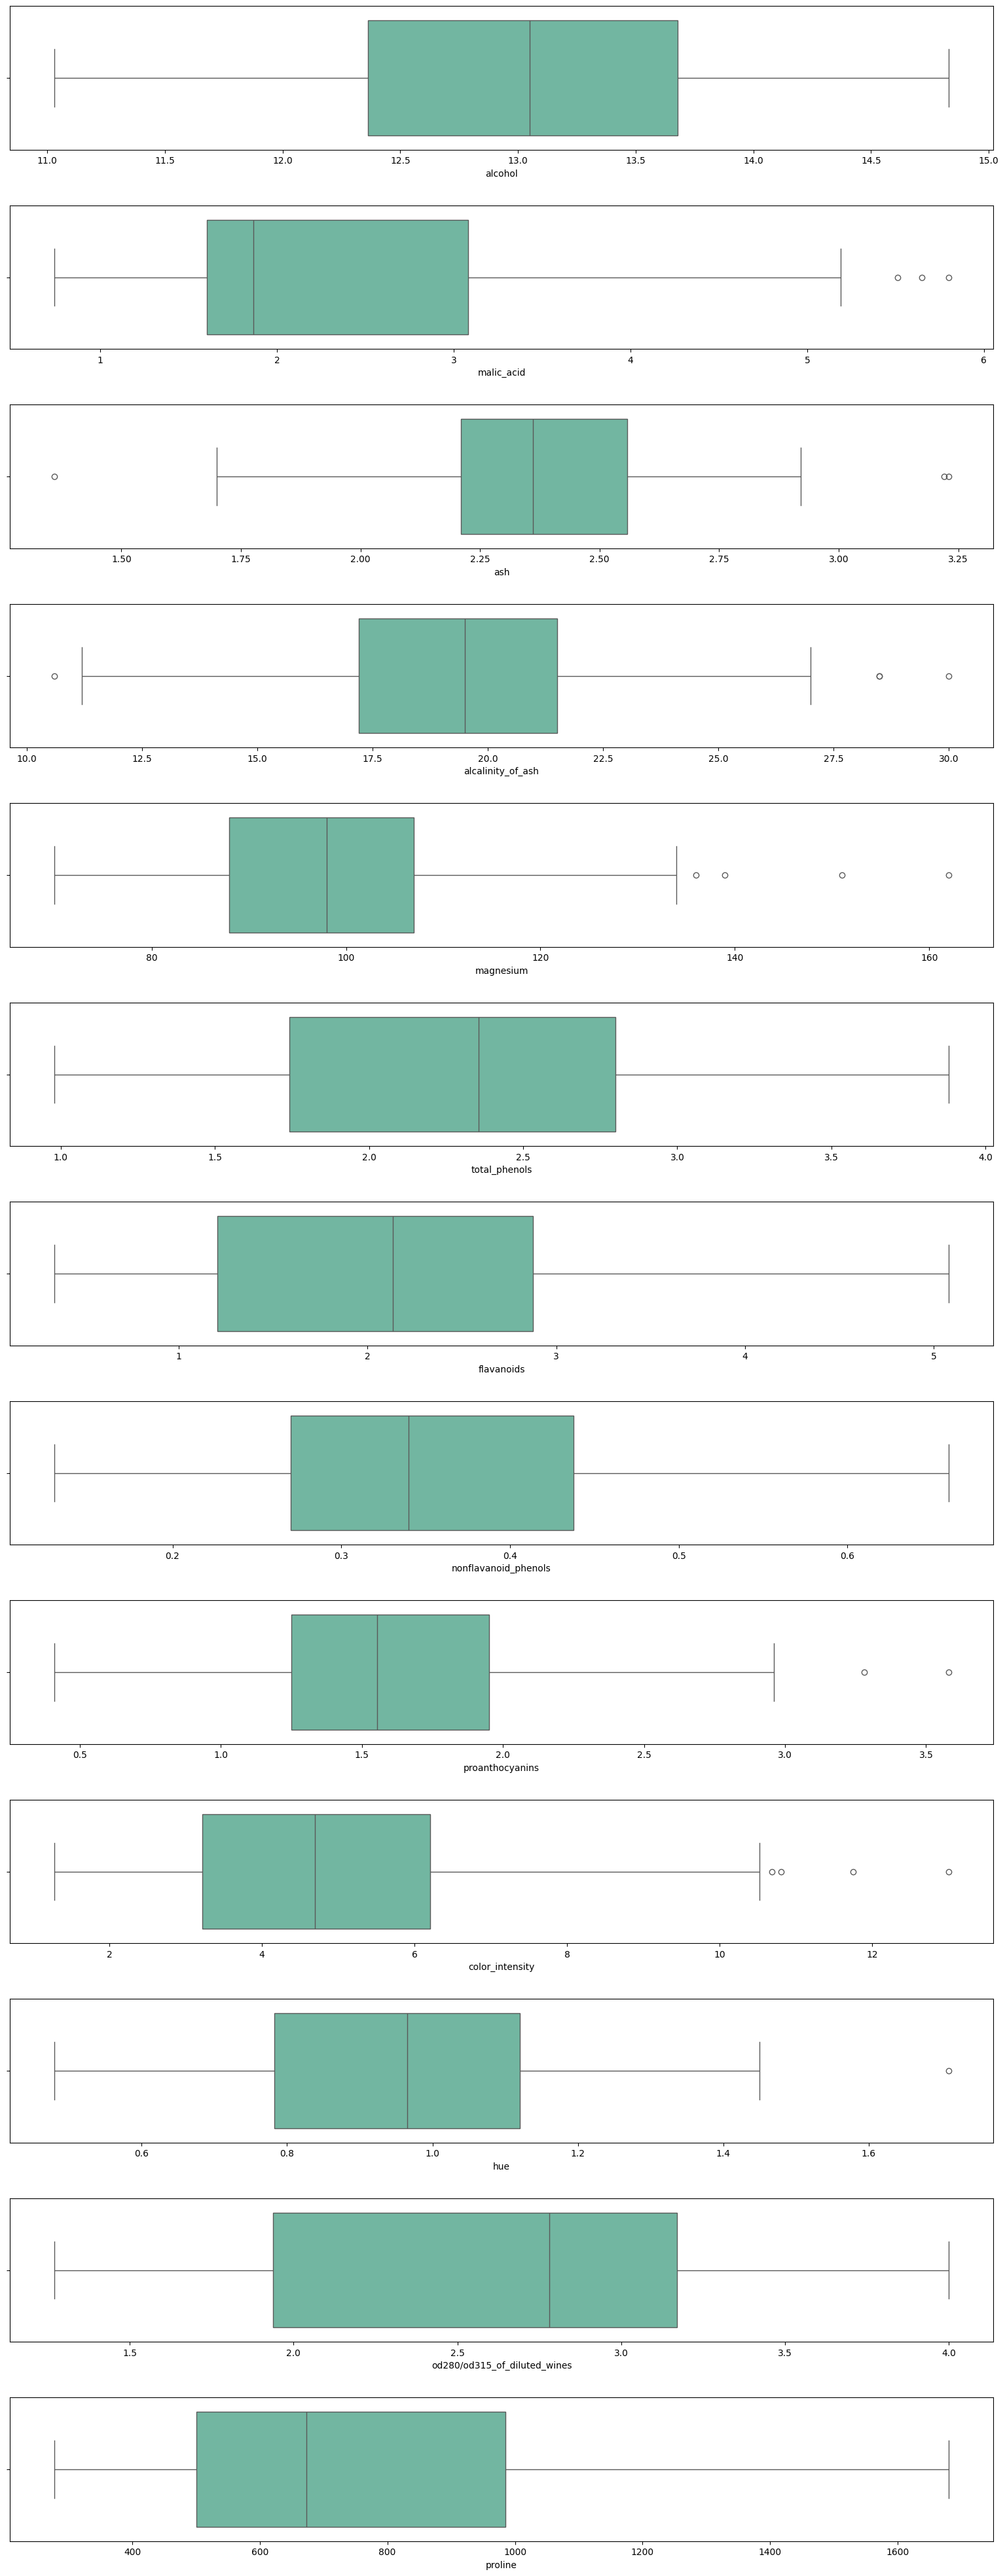

In [76]:
fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(16, 40), squeeze=False)
for i, column in enumerate(df.columns, start = 0):
    if column != "target":
        sns.boxplot(x=column, data=df, orient='h', palette='Set2', ax=axes[i, 0])
fig.tight_layout(pad=3.0)

In [75]:
print (wine_dataset)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [4]:
print (wine)

{'data': {'ids': None, 'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoi

In [8]:
df.to_csv("wine.csv", index=False) 